In [1]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.metrics import pairwise
from IPython.display import Image

In [ ]:
infiles = glob.glob('image_vectors/*.npz')
file_index_to_file_name = {}
file_index_to_file_vector = {}



In [ ]:
for file_index, i in enumerate(infiles):
  file_vector = np.loadtxt(i)
  file_name = os.path.basename(i).split('.')[0]
  file_index_to_file_name[file_index] = file_name
  file_index_to_file_vector[file_index] = file_vector
  #t.add_item(file_index, file_vector)

In [ ]:
featuredf = pd.DataFrame(columns=featurelist)
for i in range(len(file_index_to_file_name)):
    print(i)
    featuredf.loc[file_index_to_file_name[i]]=file_index_to_file_vector[i]

In [ ]:
featuredf.to_pickle("pf_feature_vecs.pkl")

In [2]:
featuredf = pd.read_pickle("pf_feature_vecs.pkl")

In [3]:
featurelist = featuredf.columns

In [4]:
testfiles = glob.glob('image_vectors_test/*.npz')
test_file_index_to_file_name = {}
test_file_index_to_file_vector = {}


In [5]:
for file_index, i in enumerate(testfiles):
  file_vector = np.loadtxt(i)
  file_name = os.path.basename(i).split('.')[0]
  test_file_index_to_file_name[file_index] = file_name
  test_file_index_to_file_vector[file_index] = file_vector
  #t.add_item(file_index, file_vector)

In [6]:
testdf = pd.DataFrame(columns=featurelist)
for i in range(len(test_file_index_to_file_name)):
    testdf.loc[test_file_index_to_file_name[i]]=test_file_index_to_file_vector[i]

In [7]:
similarity = pairwise.cosine_similarity(featuredf,testdf)

In [8]:
for ind in testdf.index:
    featuredf[ind] = similarity[:,testdf.index.get_loc(ind)]

In [9]:
featuredf.head()

,f0001,f0002,f0003,f0004,f0005,f0006,f0007,f0008,f0009,f0010,...,f2048,ewok2,pit,bichon,yorkie,jack,dach2,ewok,pit2,dach
37321899_2,0.183197,0.186004,0.153736,0.599196,0.019716,0.571135,0.124686,0.289108,0.082171,0.111400,...,0.085871,0.595198,0.761787,0.542375,0.524759,0.653219,0.543177,0.587955,0.783776,0.595384
40512061_2,0.114524,0.453137,0.491525,0.439817,0.064475,0.158420,0.172567,0.623011,0.087223,0.115736,...,0.147685,0.525923,0.547541,0.534931,0.480351,0.701017,0.460804,0.557356,0.614489,0.450545
33911103_3,0.229791,0.303604,0.175317,0.096221,0.151305,0.199762,0.305536,0.797242,0.115486,0.195803,...,0.137249,0.519247,0.666966,0.554984,0.464570,0.528400,0.448497,0.516745,0.680669,0.517185
40619395_5,0.458574,0.294704,0.201771,0.358014,0.328013,0.100848,0.062468,0.350622,0.225882,0.255917,...,0.126712,0.568298,0.615712,0.540130,0.472572,0.696292,0.501056,0.575258,0.668998,0.540110
40109856_6,0.167020,0.514602,0.364051,0.327400,0.080716,0.288681,0.198450,0.203169,0.078042,0.099737,...,0.336644,0.562049,0.497086,0.483000,0.511386,0.702518,0.457713,0.531583,0.562958,0.508387


In [35]:
inputimage = 'dach2'

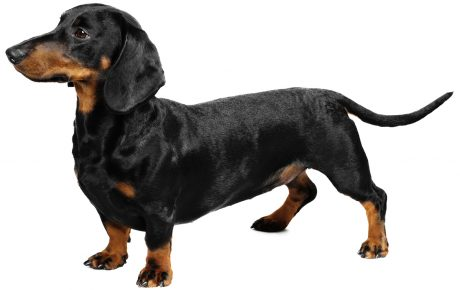

In [36]:
INPUTPATH = '/Users/miaCDIPS/Desktop/testpics/'
inputimg = Image(filename = INPUTPATH + inputimage + ".jpg", height = 600)
display(inputimg)

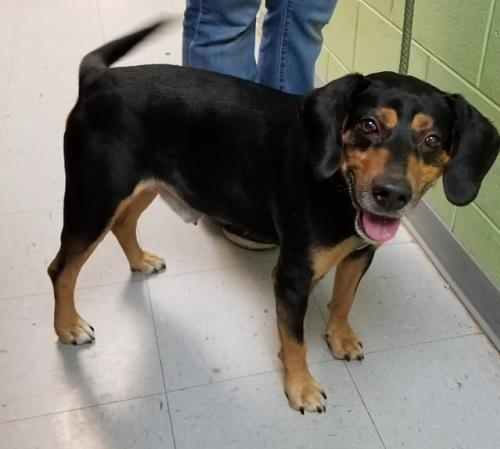

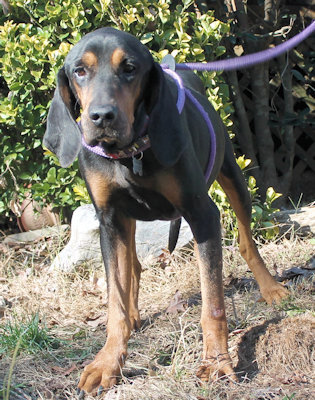

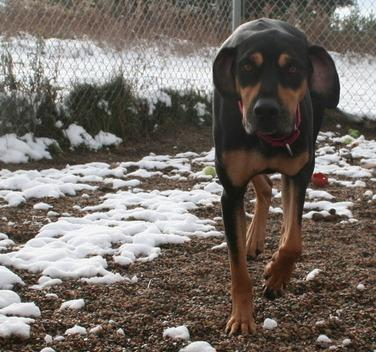

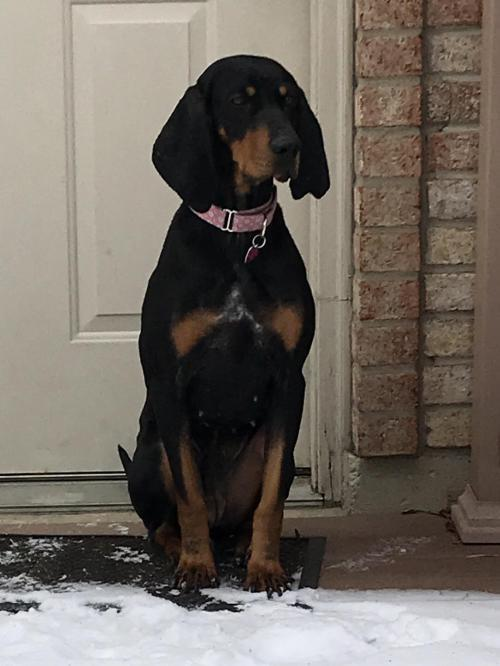

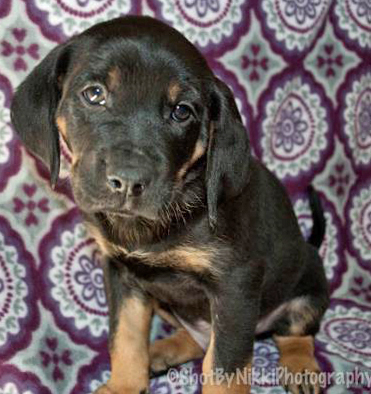

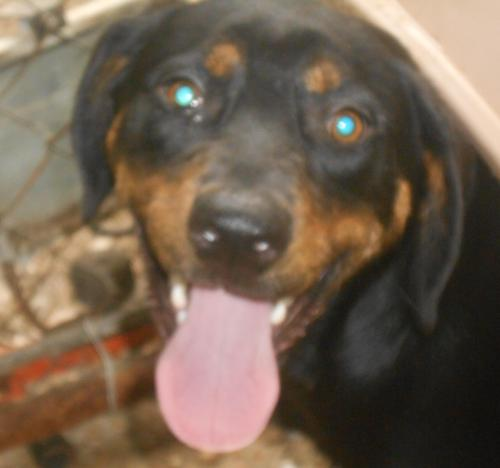

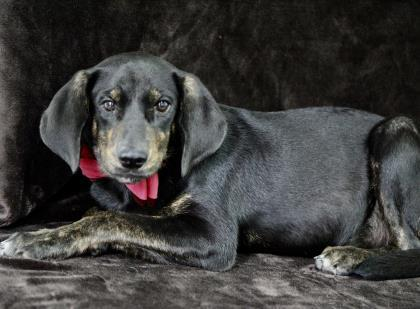

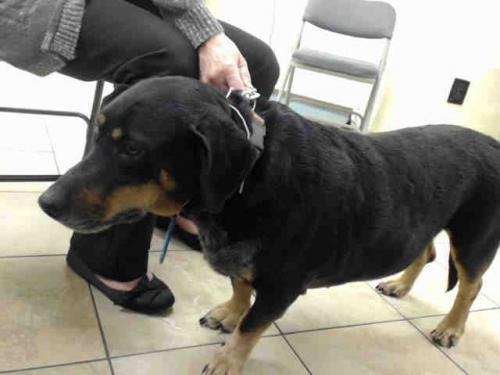

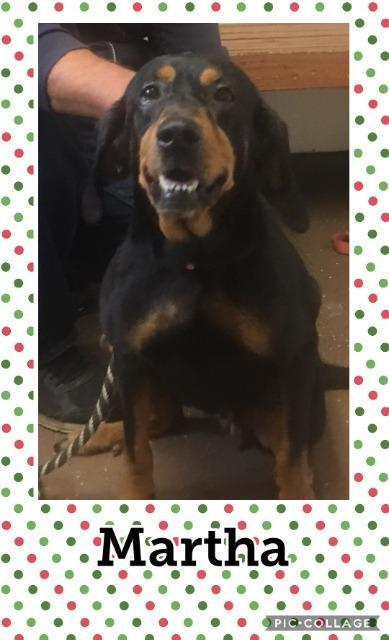

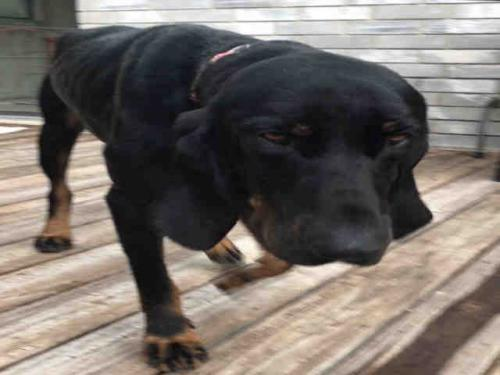

In [37]:
top10list = featuredf.sort_values(inputimage,ascending=0).head(10).index
PATH='/Users/miaCDIPS/petphotos/'
for simpic in top10list:
    img = Image(filename = PATH +simpic+".jpg",width=300)
    display(img)

In [22]:
for ind in testdf.index:
    featuredf[ind+'_dist'] = distance[:,testdf.index.get_loc(ind)]

NameError: name 'distance' is not defined

In [23]:
inputimage = 'yorkie'

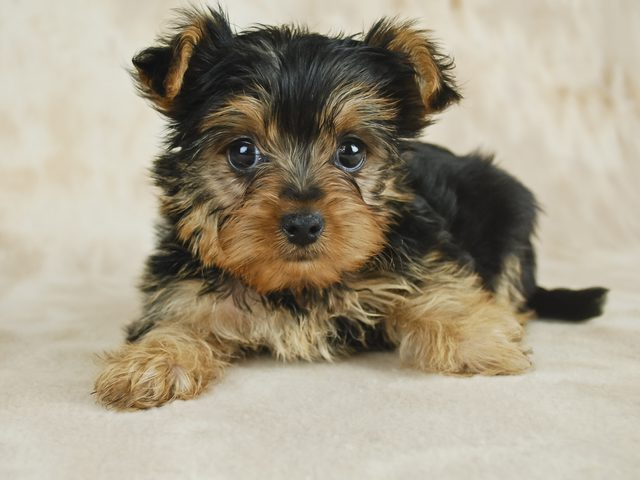

In [24]:
INPUTPATH = '/Users/miaCDIPS/Desktop/testpics/'
inputimg = Image(filename = INPUTPATH + inputimage + ".jpg",width=600)
display(inputimg)

In [25]:
top10list = featuredf.sort_values(inputimage+'_dist',ascending=True).head(10).index
PATH='/Users/miaCDIPS/petphotos/'
for simpic in top10list:
    img = Image(filename = PATH +simpic+".jpg",width=300)
    display(img)

KeyError: 'yorkie_dist'